# Let's train a diffusion generative model for point clouds using a gaussian dataset

In [1]:
import numpy as np
import os,re
import tensorflow as tf
from tensorflow import keras
import utils
from GSGM import GSGM
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

tf.random.set_seed(1233)

In [2]:
#Load the configuration file with details about the dataset
config = utils.LoadJson('config.json')

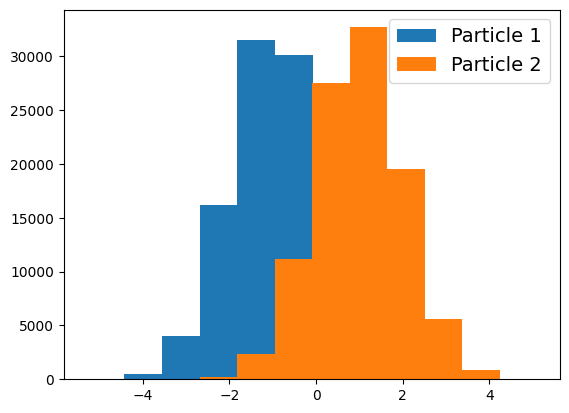

In [3]:
nevts = int(1e5)
num_feat = config['NUM_FEAT'] #3

#Let's generate sets containing 2 particles using gaussians
part1 = np.random.normal(-1.0,1.0,size=(nevts,1,num_feat))
part2 = np.random.normal(1.0,1.0,size=(nevts,1,num_feat))
data = np.concatenate([part1,part2],1)
plt.hist(part1[:,0,0],label='Particle 1')
plt.hist(part2[:,0,0],label = 'Particle 2')
plt.legend(loc='best',fontsize=14,ncol=1)

In [4]:
model = GSGM(config=config)
checkpoint_folder = '../checkpoints_toy/checkpoint'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 16)           0           ['input_1[0][0]']                
                                                                                                  
 tf.math.multiply_1 (TFOpLambda  (None, 16)          0           ['tf.math.multiply[0][0]']       
 )                                                                                                
                                                                                                  
 tf.math.multiply_2 (TFOpLambda  (None, 16)          0           ['tf.math.multiply_1[0][0]'] 

In [ ]:
opt = tf.optimizers.Adam(learning_rate=config['LR'])    
model.compile(optimizer=opt)

callbacks = []
checkpoint = ModelCheckpoint(checkpoint_folder,mode='auto',
                                     period=1,save_weights_only=True)

callbacks.append(checkpoint)

history = model.fit(
        data,
        epochs=20,
        batch_size=256,
        callbacks=callbacks
        #steps_per_epoch=1,
    )


Epoch 1/20
391/391 [==============================] - 20s 30ms/step - loss: 0.3516
Epoch 2/20
391/391 [==============================] - 11s 29ms/step - loss: 0.3035
Epoch 3/20
391/391 [==============================] - 12s 30ms/step - loss: 0.3000
Epoch 4/20
391/391 [==============================] - 13s 32ms/step - loss: 0.3019
Epoch 5/20
391/391 [==============================] - 12s 30ms/step - loss: 0.2998
Epoch 6/20
391/391 [==============================] - 11s 28ms/step - loss: 0.2985
Epoch 7/20
391/391 [==============================] - 12s 30ms/step - loss: 0.2991
Epoch 8/20
391/391 [==============================] - 12s 31ms/step - loss: 0.2975
Epoch 9/20
391/391 [==============================] - 11s 28ms/step - loss: 0.3000
Epoch 10/20
391/391 [==============================] - 11s 27ms/step - loss: 0.2988
Epoch 11/20
391/391 [==============================] - 12s 31ms/step - loss: 0.2988
Epoch 12/20
326/391 [========================>.....] - ETA: 1s - loss: 0.2995

In [ ]:
if not os.path.exists('../plots'):
    os.mkdir('../plots')
generated = model.PCSampler(nevts,2).numpy()

In [ ]:
#Let's do some plotting
feed_dict = {
    'gen':np.max(generated[:,:,0],1),
    'true':np.max(data[:,:,0],1),
}

binning = np.linspace(-2,4,20)
fig,ax0 =utils.HistRoutine(feed_dict,xlabel='max feat', ylabel= 'Normalized entries',
                               logy=False,binning=binning)
fig.savefig('../plots/toy_max.pdf')

In [ ]:
feed_dict = {
    'gen':generated[:,0,0],
    'true':data[:,0,0],
}

binning = np.linspace(-4,4,20)
fig,ax0 =utils.HistRoutine(feed_dict,xlabel='feat 0', ylabel= 'Normalized entries',
                               logy=False,binning=binning)
fig.savefig('../plots/toy.pdf')

# Does this plot make sense to you?

In [ ]:
feed_dict = {
        'gen':generated[:,0,0]+generated[:,1,0],
        'true':data[:,0,0]+data[:,1,0],
}

binning = np.linspace(-5.0,5.0,10)
fig,ax0 =utils.HistRoutine(feed_dict,xlabel='diff feat', ylabel= 'Normalized entries',
                               logy=False,binning=binning)
fig.savefig('../plots/toy_diff.pdf')